<a href="https://colab.research.google.com/github/am-1t/Data_Analysis_with_Python/blob/main/analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the dataset from URL and adding the necessary headers.

In [53]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv")

Replace the column headers in the pandas dataframe with a python list containing name of headers.

In [54]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

**Evaluating for Missing Data:**
Replacing the missing values in the dataset coming as '?' with the NaN(not a number) and finding the number of missing value in each columns. Replacing the missing values by their mean and dropping the rows where price is missing.

In [55]:
df.replace('?', np.nan, inplace=True)

for column in df.columns:
    if df[column].isnull().sum() != 0:
        print(f"'{column}' has {df[column].isnull().sum()} missing values")

'normalized-losses' has 40 missing values
'num-of-doors' has 2 missing values
'bore' has 4 missing values
'stroke' has 4 missing values
'horsepower' has 2 missing values
'peak-rpm' has 2 missing values
'price' has 4 missing values


In [56]:
avg_norm_loss = df['normalized-losses'].astype(np.float32).mean(axis=0)
df.replace({'normalized-losses': np.nan}, avg_norm_loss, inplace=True)

In [57]:
avg_bore = df['bore'].astype(np.float32).mean(axis=0)
df.replace({'bore': np.nan}, avg_bore, inplace=True)

In [58]:
avg_stroke = df['stroke'].astype(np.float32).mean(axis=0)
df.replace({'stroke': np.nan}, avg_stroke, inplace=True)

In [59]:
avg_hp = df['horsepower'].astype(np.float32).mean(axis=0)
df.replace({'horsepower': np.nan}, avg_hp, inplace=True)

In [60]:
avg_rpm = df['peak-rpm'].astype(np.float32).mean(axis=0)
df.replace({'peak-rpm': np.nan}, avg_rpm, inplace=True)

In [61]:
df.replace({'num-of-doors': np.nan}, 'four', inplace=True)

In [62]:
df.dropna(subset=['price'], axis=0, inplace=True)

**Correct Data Format:** Convert data types to proper format

In [63]:
 df[['bore', 'stroke', 'price', 'peak-rpm', 'normalized-losses']] = df[['bore', 'stroke', 'price', 'peak-rpm', 'normalized-losses']].astype(np.float32)

**Data Standardisation:** Standardization is the process of transforming data into a common format, allowing for meaningful comparisons.
Transform mpg to L/100km

In [64]:
df['city/L-100km'] = 235/df['city-mpg']

Transform the highway-mpg to highway-L/100km

In [65]:
df['highway-mpg'] = 235/df['highway-mpg']
df.rename(columns={'highway-mpg': 'highway-L/100km'}, inplace=True)

**Data Normalization:** Transform values of several variable into similar range.
Normalized the 'width', 'height', and 'length' into the value range from 0 to 1.

In [66]:
df['length'] /= df['length'].max()
df['height'] /= df['height'].max()
df['width'] /= df['width'].max()

Plot the distribution of the horsepower to see the distribution of horsepower


Text(0.5, 1.0, 'Horsepower Distribution')

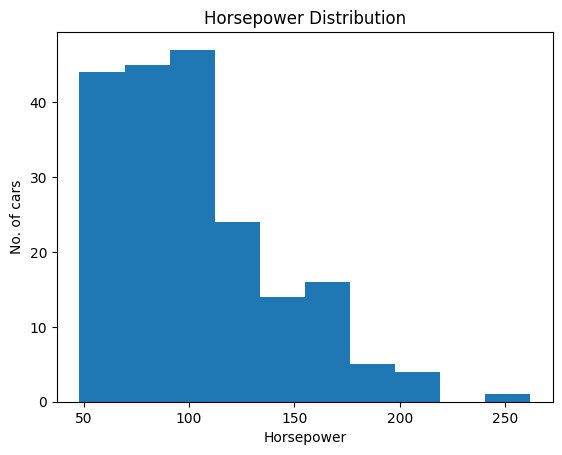

In [75]:
plt.hist(df['horsepower'])
plt.xlabel('Horsepower')
plt.ylabel('No. of cars')
plt.title('Horsepower Distribution')

**Binning:** Transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis. Convert the horsepower into three segments viz High, Medium, and little horsepower.

In [70]:
df['horsepower'] = df['horsepower'].astype(np.int32)
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins_names = ['Low', 'Medium', 'High']
df['horsepower-bin'] = pd.cut(df['horsepower'], bins, labels=bins_names, include_lowest=True )
df['horsepower-bin'].value_counts()

,count
horsepower-bin,
Low,152
Medium,43
High,5


Plot the distribution of the horsepower to see the distribution of horsepower after binning.


Text(0.5, 1.0, 'Horsepower Distribution')

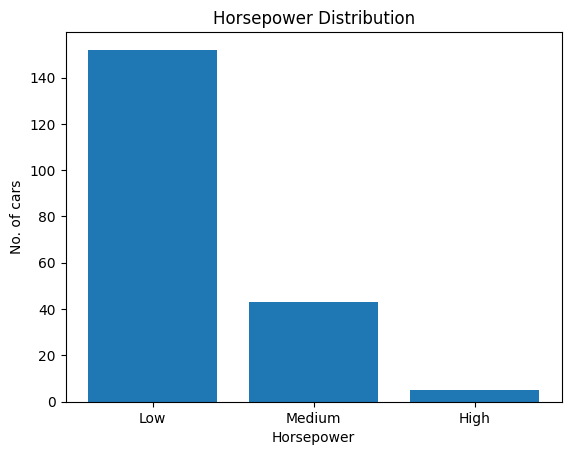

In [71]:
plt.bar(bins_names, df['horsepower-bin'].value_counts())
plt.xlabel('Horsepower')
plt.ylabel('No. of cars')
plt.title('Horsepower Distribution')

**Indicator Variable:** An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

 We use indicator variables so you can use categorical variables for regression analysis as regression doesn't understand words, only numbers.

In [72]:
dummy1 = pd.get_dummies(df['fuel-type'])
dummy1.rename(columns={'gas': 'fuel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)
df = pd.concat([df, dummy1], axis=1)
df.drop('fuel-type', axis=1, inplace=True)

In [73]:
dummy2 = pd.get_dummies(df['aspiration'])
dummy2.rename(columns={'std': 'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy2], axis=1)
df.drop('aspiration', axis=1, inplace=True)

In [76]:
df.head(10)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city/L-100km,horsepower-bin,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
1,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
2,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
3,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False
4,2,122.0,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,9.400000,15250.0,12.368421,Low,False,True,True,False
5,1,158.0,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,19,9.400000,17710.0,12.368421,Low,False,True,True,False
6,1,122.0,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,5500.0,19,9.400000,18920.0,12.368421,Low,False,True,True,False
7,1,158.0,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,17,11.750000,23875.0,13.823529,Medium,False,True,False,True
9,2,192.0,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,5800.0,23,8.103448,16430.0,10.217391,Low,False,True,True,False
10,0,192.0,bmw,four,sedan,rwd,front,101.2,0.849592,0.900000,...,5800.0,23,8.103448,16925.0,10.217391,Low,False,True,True,False
